In [ ]:
!apt-get install openjdk-8-jdk -qq > /dev/null

In [ ]:
!pip install h2o -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML

import matplotlib.pyplot as plt
from scipy import stats


%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv',index_col=0)

df.head()
df = df[24:]
d = df['pm2.5']
print(df.shape)
s_fwd = d.interpolate(method="polynomial", order=3, limit_direction = 'forward')
s_bkd = d.interpolate(method="polynomial", order=3, limit_direction = 'backward')
print(s_fwd.count())
print(s_bkd.count())
type(s_bkd)
tmp_df = pd.DataFrame()
tmp_df['fwd'] = s_fwd
tmp_df['bkd'] = s_bkd
tmp_df['mean']= tmp_df.mean(axis = 1)
tmp_df['mean'][tmp_df['mean']<0] = 0
df['pm2.5'] = tmp_df['mean']
df.index.name = 'date'
df.index = pd.to_datetime(df[['year','month','day','hour']])


(43800, 12)
43800
43800


In [ ]:
df.drop(['year','month','day','hour'], axis = 1, inplace = True)
df.describe()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,99.957312,1.828516,12.459041,1016.447306,23.894307,0.052763,0.195023
std,95.079764,14.429326,12.193384,10.271411,50.022729,0.760582,1.416247
min,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,73.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,138.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,1074.314462,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [ ]:
df = df.reset_index(drop=True)
df = df.drop(['cbwd'], axis = 1)

In [ ]:
df

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
0,129.0,-16,-4.0,1020.0,1.79,0,0
1,148.0,-15,-4.0,1020.0,2.68,0,0
2,159.0,-11,-5.0,1021.0,3.57,0,0
3,181.0,-7,-5.0,1022.0,5.36,1,0
4,138.0,-7,-5.0,1022.0,6.25,2,0
...,...,...,...,...,...,...,...
43795,8.0,-23,-2.0,1034.0,231.97,0,0
43796,10.0,-22,-3.0,1034.0,237.78,0,0
43797,10.0,-22,-3.0,1034.0,242.70,0,0
43798,8.0,-22,-4.0,1034.0,246.72,0,0


2
Index(['pm2.5', 'pm2.5_lag1', 'pm2.5_avg_window_length2', 'pm2.5_lag2',
       'pm2.5_avg_window_length3', 'DEWP_lag1', 'DEWP_avg_window_length2',
       'DEWP_lag2', 'DEWP_avg_window_length3', 'TEMP_lag1',
       'TEMP_avg_window_length2', 'TEMP_lag2', 'TEMP_avg_window_length3',
       'PRES_lag1', 'PRES_avg_window_length2', 'PRES_lag2',
       'PRES_avg_window_length3', 'Iws_lag1', 'Iws_avg_window_length2',
       'Iws_lag2', 'Iws_avg_window_length3', 'Is_lag1',
       'Is_avg_window_length2', 'Is_lag2', 'Is_avg_window_length3', 'Ir_lag1',
       'Ir_avg_window_length2', 'Ir_lag2', 'Ir_avg_window_length3'],
      dtype='object')


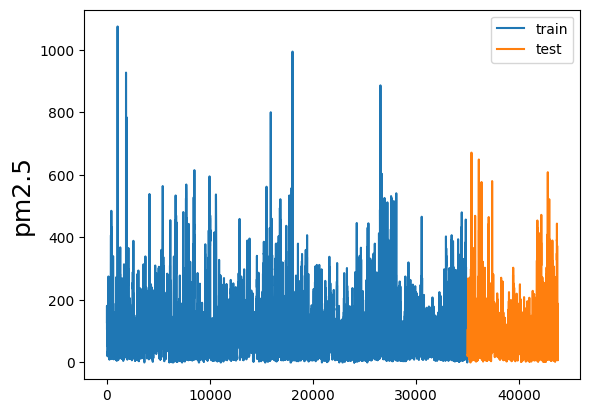

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp038y_e5l
  JVM stdout: /tmp/tmp038y_e5l/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp038y_e5l/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.1
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_unknownUser_1h805i
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:35038
Cols:29

,pm2.5,pm2.5_lag1,pm2.5_avg_window_length2,pm2.5_lag2,pm2.5_avg_window_length3,DEWP_lag1,DEWP_avg_window_length2,DEWP_lag2,DEWP_avg_window_length3,TEMP_lag1,TEMP_avg_window_length2,TEMP_lag2,TEMP_avg_window_length3,PRES_lag1,PRES_avg_window_length2,PRES_lag2,PRES_avg_window_length3,Iws_lag1,Iws_avg_window_length2,Iws_lag2,Iws_avg_window_length3,Is_lag1,Is_avg_window_length2,Is_lag2,Is_avg_window_length3,Ir_lag1,Ir_avg_window_length2,Ir_lag2,Ir_avg_window_length3
type,real,real,real,real,real,int,real,int,real,int,real,int,real,real,real,real,real,real,real,real,real,int,real,int,real,int,real,int,real
mins,0.0,0.0,0.0,0.0,0.0,-33.0,-32.5,-33.0,-32.333333333333336,-19.0,-18.5,-19.0,-18.666666666666668,991.0,991.0,991.0,991.3333333333334,0.45,0.6699999999999752,0.45,0.5966666666666074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,100.39090868411216,100.38779777595546,100.38601399834249,100.38423022072952,100.38413508592386,1.7737313773617096,1.773660026257196,1.773588675152682,1.7735506212302874,12.154517951937912,12.1546749243678,12.154831896797779,12.154841410278369,1016.3997088874936,1016.3996232661688,1016.3995376448443,1016.3995281313631,24.960667846338318,24.96259418345806,24.96452052057774,24.964567326902216,0.05748044979736285,0.05748044979736289,0.05748044979736285,0.057480449797362825,0.20988640904161204,0.2098864090416119,0.20988640904161204,0.20988640904161207
maxs,1074.3144617441028,1074.3144617441028,1027.1572308720515,1074.3144617441028,884.438153914701,28.0,28.0,28.0,28.0,41.0,41.0,41.0,41.0,1046.0,1046.0,1046.0,1046.0,585.6,583.5899999999999,585.6,581.58,27.0,26.5,27.0,26.0,36.0,35.5,36.0,35.0
sigma,95.12664333383837,95.12749000872967,94.33878729823438,95.12804829148172,93.56644706262179,14.494549458027358,14.478999105581032,14.494739215864646,14.466232486296711,12.307051741030008,12.28454408524589,12.30677993646578,12.260245339160141,10.3864755664283,10.380632953793341,10.38646566768263,10.374716611465825,51.31352463273322,50.664177244664934,51.31691921305906,50.15402446861097,0.7738600201747008,0.7544567353000596,0.7738600201747008,0.7392620131666783,1.4899698460290225,1.4530202872791154,1.4899698460290225,1.4253063933401222
zeros,319,319,304,319,291,636,344,636,240,882,518,882,376,0,0,0,0,0,0,0,0,34707,34650,34707,34596,33522,33078,33522,32713
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,129.0,148.0,153.5,159.0,162.66666666666666,-15.0,-13.0,-11.0,-11.0,-4.0,-4.5,-5.0,-4.666666666666667,1020.0,1020.5,1021.0,1021.0,2.68,3.125,3.57,3.87,0.0,0.0,0.0,0.3333333333333333,0.0,0.0,0.0,0.0
1,148.0,159.0,170.0,181.0,159.33333333333334,-11.0,-9.0,-7.0,-8.333333333333334,-5.0,-5.0,-5.0,-5.0,1021.0,1021.5,1022.0,1021.6666666666666,3.57,4.465,5.36,5.06,0.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0
2,159.0,181.0,159.5,138.0,142.66666666666666,-7.0,-7.0,-7.0,-7.0,-5.0,-5.0,-5.0,-5.333333333333333,1022.0,1022.0,1022.0,1022.0,5.36,5.805,6.25,6.25,1.0,1.5,2.0,2.0,0.0,0.0,0.0,0.0


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_4_AutoML_1_20230721_64159


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       6/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# DRF base models (used / total)           2/2
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           1/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **


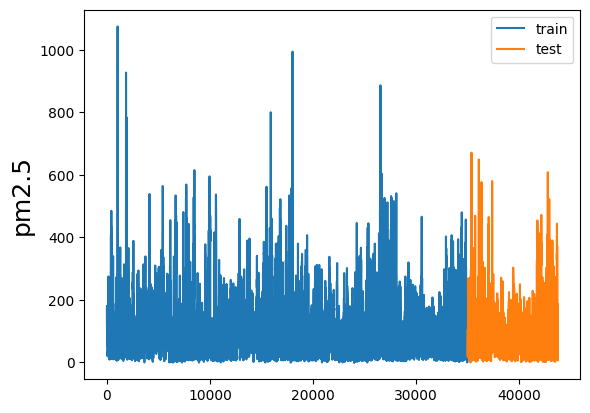

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 0 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.1
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_unknownUser_1h805i
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.606 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:35037
Cols:57

,pm2.5,pm2.5_lag1,pm2.5_avg_window_length2,pm2.5_lag2,pm2.5_avg_window_length3,pm2.5_lag3,pm2.5_avg_window_length4,pm2.5_lag4,pm2.5_avg_window_length5,DEWP_lag1,DEWP_avg_window_length2,DEWP_lag2,DEWP_avg_window_length3,DEWP_lag3,DEWP_avg_window_length4,DEWP_lag4,DEWP_avg_window_length5,TEMP_lag1,TEMP_avg_window_length2,TEMP_lag2,TEMP_avg_window_length3,TEMP_lag3,TEMP_avg_window_length4,TEMP_lag4,TEMP_avg_window_length5,PRES_lag1,PRES_avg_window_length2,PRES_lag2,PRES_avg_window_length3,PRES_lag3,PRES_avg_window_length4,PRES_lag4,PRES_avg_window_length5,Iws_lag1,Iws_avg_window_length2,Iws_lag2,Iws_avg_window_length3,Iws_lag3,Iws_avg_window_length4,Iws_lag4,Iws_avg_window_length5,Is_lag1,Is_avg_window_length2,Is_lag2,Is_avg_window_length3,Is_lag3,Is_avg_window_length4,Is_lag4,Is_avg_window_length5,Ir_lag1,Ir_avg_window_length2,Ir_lag2,Ir_avg_window_length3,Ir_lag3,Ir_avg_window_length4,Ir_lag4,Ir_avg_window_length5
type,real,real,real,real,real,real,real,real,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.0,-32.5,-33.0,-32.333333333333336,-33.0,-31.5,-33.0,-31.2,-19.0,-18.5,-19.0,-18.666666666666668,-19.0,-18.5,-19.0,-18.2,991.0,991.0,991.0,991.3333333333334,991.0,991.75,991.0,992.2,0.45,0.6699999999999752,0.45,0.5966666666666074,0.45,0.669999999999928,0.45,0.7139999999999431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,100.3931175178789,100.3900921447023,100.38826550429353,100.38643886388455,100.38636275386773,100.382557253016,100.38429113434154,100.37807627576373,100.38256296126758,1.7743813682678349,1.7742957444986704,1.7742101207295176,1.774181579473128,1.773953249422037,1.7740317378771038,1.7735822130890166,1.7738676256528776,12.154693609612705,12.154836315894608,12.154979022176578,12.154998049680792,12.1553215172532,12.155164540343046,12.155664012329817,12.155332933755746,1016.3997773782006,1016.3996917544318,1016.3996061306625,1016.3995966169111,1016.3994063418666,1016.3994919656357,1016.3991780118163,1016.3993778006114,24.957655050375294,24.95947940748366,24.961303764591776,24.961363320680007,24.965131147073095,24.963290806861327,24.969073265405097,24.965253589062947,0.05748209036161772,0.05748209036161773,0.05748209036161772,0.05748209036161769,0.05748209036161772,0.057474955047521196,0.05745354910523162,0.05745925735650884,0.2098923994634244,0.2098923994634245,0.2098923994634244,0.20989239946342447,0.2098923994634244,0.20989239946342433,0.2098923994634244,0.20989239946342428
maxs,1074.3144617441028,1074.3144617441028,1027.1572308720515,1074.3144617441028,884.438153914701,1074.3144617441028,855.0,1074.3144617441028,845.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,27.8,41.0,41.0,41.0,41.0,41.0,40.75,41.0,40.6,1046.0,1046.0,1046.0,1046.0,1046.0,1046.0,1046.0,1046.0,585.6,583.5899999999999,585.6,581.58,585.6,579.5699999999999,585.6,577.738,27.0,26.5,27.0,26.0,27.0,25.5,27.0,25.0,36.0,35.5,36.0,35.0,36.0,34.5,36.0,34.0
sigma,95.12710233149876,95.1278780884651,94.33919220212792,95.12850747753569,93.56685316620818,95.12889041149514,92.80514907910515,95.12879056245453,92.05838540345665,14.494245647416873,14.478716729023047,14.494479282813286,14.465956798069701,14.494785419767117,14.453505854826718,14.495176402311804,14.441046198593469,12.30718345069172,12.284682250601287,12.306924751796238,12.26038524373552,12.306614297205696,12.232098699017213,12.306303825250975,12.20007876655203,10.386615878686698,10.380773178783182,10.386605980920656,10.374856748136908,10.3865848120409,10.36801270863857,10.386549622345278,10.360299324296742,51.31115782014467,50.66154534700548,51.314118858612,50.151154199616606,51.317524259752716,49.674738868647815,51.321323108711354,49.212614349189835,0.7738710029485412,0.7544674396038666,0.7738710029485412,0.739272499343031,0.7738710029485412,0.7251850039981366,0.7738

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_3_AutoML_2_20230721_74223


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       5/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# DRF base models (used / total)           1/2
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           1/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **


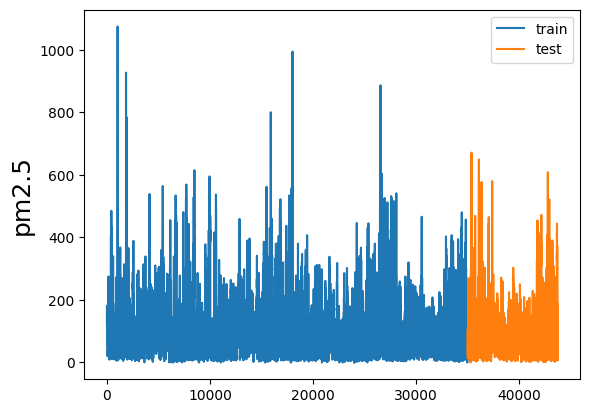

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 hours 0 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.1
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_unknownUser_1h805i
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.236 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:35035
Cols:85

,pm2.5,pm2.5_lag1,pm2.5_avg_window_length2,pm2.5_lag2,pm2.5_avg_window_length3,pm2.5_lag3,pm2.5_avg_window_length4,pm2.5_lag4,pm2.5_avg_window_length5,pm2.5_lag5,pm2.5_avg_window_length6,pm2.5_lag6,pm2.5_avg_window_length7,DEWP_lag1,DEWP_avg_window_length2,DEWP_lag2,DEWP_avg_window_length3,DEWP_lag3,DEWP_avg_window_length4,DEWP_lag4,DEWP_avg_window_length5,DEWP_lag5,DEWP_avg_window_length6,DEWP_lag6,DEWP_avg_window_length7,TEMP_lag1,TEMP_avg_window_length2,TEMP_lag2,TEMP_avg_window_length3,TEMP_lag3,TEMP_avg_window_length4,TEMP_lag4,TEMP_avg_window_length5,TEMP_lag5,TEMP_avg_window_length6,TEMP_lag6,TEMP_avg_window_length7,PRES_lag1,PRES_avg_window_length2,PRES_lag2,PRES_avg_window_length3,PRES_lag3,PRES_avg_window_length4,PRES_lag4,PRES_avg_window_length5,PRES_lag5,PRES_avg_window_length6,PRES_lag6,PRES_avg_window_length7,Iws_lag1,Iws_avg_window_length2,Iws_lag2,Iws_avg_window_length3,Iws_lag3,Iws_avg_window_length4,Iws_lag4,Iws_avg_window_length5,Iws_lag5,Iws_avg_window_length6,Iws_lag6,Iws_avg_window_length7,Is_lag1,Is_avg_window_length2,Is_lag2,Is_avg_window_length3,Is_lag3,Is_avg_window_length4,Is_lag4,Is_avg_window_length5,Is_lag5,Is_avg_window_length6,Is_lag6,Is_avg_window_length7,Ir_lag1,Ir_avg_window_length2,Ir_lag2,Ir_avg_window_length3,Ir_lag3,Ir_avg_window_length4,Ir_lag4,Ir_avg_window_length5,Ir_lag5,Ir_avg_window_length6,Ir_lag6,Ir_avg_window_length7
type,real,real,real,real,real,real,real,real,real,real,real,real,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.0,-32.5,-33.0,-32.333333333333336,-33.0,-31.5,-33.0,-31.2,-33.0,-30.666666666666668,-33.0,-30.285714285714285,-19.0,-18.5,-19.0,-18.666666666666668,-19.0,-18.5,-19.0,-18.2,-19.0,-17.833333333333332,-19.0,-17.571428571428573,991.0,991.0,991.0,991.3333333333334,991.0,991.75,991.0,992.2,991.0,992.5,991.0,992.7142857142856,0.45,0.6699999999999752,0.45,0.5966666666666074,0.45,0.669999999999928,0.45,0.7139999999999431,0.45,0.7433333333333144,0.45,0.7642857142857142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,100.39770682100549,100.39465273223726,100.39279744466758,100.39094215709802,100.39088507132654,100.38706032464476,100.38878003350733,100.38246492004932,100.38686052444483,100.37918248819534,100.38517649418942,100.37675634291219,100.38376158257047,1.7756814613957408,1.7755958327386818,1.775510204081648,1.7754721469007244,1.7752247752247825,1.7753104038818373,1.774825174825178,1.7751391465677224,1.7744541173112585,1.7749631321059887,1.7740830597973463,1.774784399274195,12.15498786927357,12.155144855144849,12.155301841016106,12.155311355311367,12.155644355644359,12.155473098330248,12.155958327386912,12.155638647067217,12.156300842015131,12.15581085581086,12.156671899529055,12.155986870272587,1016.3999143713429,1016.3998287426859,1016.3997431140289,1016.3997335997333,1016.3995433138299,1016.3996289424853,1016.3993149707434,1016.3995204795218,1016.3990866276581,1016.3994101136961,1016.3988582845736,1016.3992905054128,24.952075638647067,24.95374696731846,24.955418295989713,24.955465106322194,24.95890138432996,24.95721728271722,24.96247381190239,24.959018809761645,24.966224917939197,24.960868417297007,24.970116454973617,24.96275459234644,0.057485371771086057,0.057485371771086057,0.057485371771086057,0.05748537177108604,0.057485371771086057,0.05747823604966464,0.0574568288854003,0.05746253746253746,0.05739974311402883,0.057437800294943164,0.057314114456971585,0.05740382066912681,0.20990438133295272,0.20990438133295275,0.20990438133295275,0.20990438133295275,0.20990438133295275,0.20990438133295275,0.20990438133295275,0.20990438133295272,0.20990438133295275,0.20990

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_4_AutoML_3_20230721_84245


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       17/56
# GBM base models (used / total)           9/17
# XGBoost base models (used / total)       5/28
# DRF base models (used / total)           1/2
# GLM base models (used / total)           1/1
# DeepLearning base models (used / total)  1/8
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

<ipython-input-8-e042e2f90626>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[column + '_lag' + str(lag)] = df2[column].shift(lag*-1-(delay-1))
<ipython-input-8-e042e2f90626>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[column + '_avg_window_length' + str(lag+1)] = df2[column].shift(-1-(delay-1)).rolling(window=lag+1,center=False).mean().shift(1-(lag+1))
<ipython-input-8-e042e2f90626>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has 

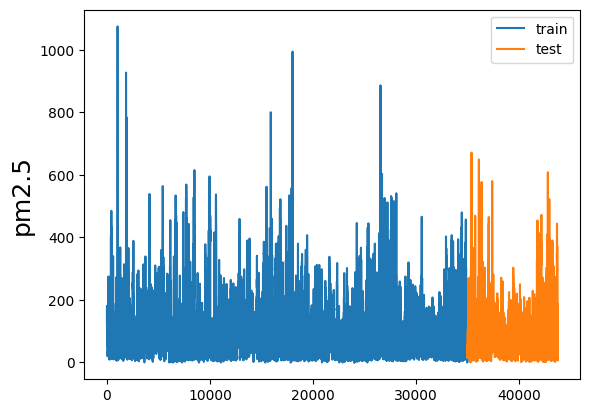

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 hours 1 min
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.1
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_unknownUser_1h805i
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.911 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:35033
Cols:113

,pm2.5,pm2.5_lag1,pm2.5_avg_window_length2,pm2.5_lag2,pm2.5_avg_window_length3,pm2.5_lag3,pm2.5_avg_window_length4,pm2.5_lag4,pm2.5_avg_window_length5,pm2.5_lag5,pm2.5_avg_window_length6,pm2.5_lag6,pm2.5_avg_window_length7,pm2.5_lag7,pm2.5_avg_window_length8,pm2.5_lag8,pm2.5_avg_window_length9,DEWP_lag1,DEWP_avg_window_length2,DEWP_lag2,DEWP_avg_window_length3,DEWP_lag3,DEWP_avg_window_length4,DEWP_lag4,DEWP_avg_window_length5,DEWP_lag5,DEWP_avg_window_length6,DEWP_lag6,DEWP_avg_window_length7,DEWP_lag7,DEWP_avg_window_length8,DEWP_lag8,DEWP_avg_window_length9,TEMP_lag1,TEMP_avg_window_length2,TEMP_lag2,TEMP_avg_window_length3,TEMP_lag3,TEMP_avg_window_length4,TEMP_lag4,TEMP_avg_window_length5,TEMP_lag5,TEMP_avg_window_length6,TEMP_lag6,TEMP_avg_window_length7,TEMP_lag7,TEMP_avg_window_length8,TEMP_lag8,TEMP_avg_window_length9,PRES_lag1,PRES_avg_window_length2,PRES_lag2,PRES_avg_window_length3,PRES_lag3,PRES_avg_window_length4,PRES_lag4,PRES_avg_window_length5,PRES_lag5,PRES_avg_window_length6,PRES_lag6,PRES_avg_window_length7,PRES_lag7,PRES_avg_window_length8,PRES_lag8,PRES_avg_window_length9,Iws_lag1,Iws_avg_window_length2,Iws_lag2,Iws_avg_window_length3,Iws_lag3,Iws_avg_window_length4,Iws_lag4,Iws_avg_window_length5,Iws_lag5,Iws_avg_window_length6,Iws_lag6,Iws_avg_window_length7,Iws_lag7,Iws_avg_window_length8,Iws_lag8,Iws_avg_window_length9,Is_lag1,Is_avg_window_length2,Is_lag2,Is_avg_window_length3,Is_lag3,Is_avg_window_length4,Is_lag4,Is_avg_window_length5,Is_lag5,Is_avg_window_length6,Is_lag6,Is_avg_window_length7,Is_lag7,Is_avg_window_length8,Is_lag8,Is_avg_window_length9,Ir_lag1,Ir_avg_window_length2,Ir_lag2,Ir_avg_window_length3,Ir_lag3,Ir_avg_window_length4,Ir_lag4,Ir_avg_window_length5,Ir_lag5,Ir_avg_window_length6,Ir_lag6,Ir_avg_window_length7,Ir_lag7,Ir_avg_window_length8,Ir_lag8,Ir_avg_window_length9
type,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.0,-32.5,-33.0,-32.333333333333336,-33.0,-31.5,-33.0,-31.2,-33.0,-30.666666666666668,-33.0,-30.285714285714285,-33.0,-30.0,-33.0,-29.77777777777778,-19.0,-18.5,-19.0,-18.666666666666668,-19.0,-18.5,-19.0,-18.2,-19.0,-17.833333333333332,-19.0,-17.571428571428573,-19.0,-17.375,-19.0,-17.22222222222222,991.0,991.0,991.0,991.3333333333334,991.0,991.75,991.0,992.2,991.0,992.5,991.0,992.7142857142856,991.0,992.875,991.0,993.0,0.45,0.6699999999999752,0.45,0.5966666666666074,0.45,0.669999999999928,0.45,0.7139999999999431,0.45,0.7433333333333144,0.45,0.7642857142857142,0.45,0.78,0.45,0.8422222222222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,100.40241082619049,100.39932801855187,100.39742980829307,100.39553159803407,100.39549353868058,100.39162099945564,100.39336221488107,100.38696824348273,100.3914268967524,100.38368562423786,100.38971327435823,100.38114516238774,100.38815487975619,100.3788045121436,100.38662927736496,100.37595006062645,100.38523019966996,1.7768675249050843,1.7768104358747403,1.7767533468443943,1.776715287490844,1.7765249907230303,1.7765678074957916,1.776125367510631,1.7763993948562724,1.7757257442982388,1.7762205158945383,1.7753261210858415,1.7760397339651208,1.7749550423885934,1.7758577626809107,1.774583963691386,1.7756781701062776,12.155253618017303,12.155424885108312,12.155596152199369,12.155596152199339,12.155938686381399,12.155767419290367,12.156281220563459,12.15593868638142,12.156623754745526,12.1561099534

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_4_AutoML_4_20230721_94305


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       12/44
# GBM base models (used / total)           6/14
# XGBoost base models (used / total)       4/20
# GLM base models (used / total)           1/1
# DRF base models (used / total)           0/2
# DeepLearning base models (used / total)  1/7
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

<ipython-input-8-e042e2f90626>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[column + '_lag' + str(lag)] = df2[column].shift(lag*-1-(delay-1))
<ipython-input-8-e042e2f90626>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[column + '_avg_window_length' + str(lag+1)] = df2[column].shift(-1-(delay-1)).rolling(window=lag+1,center=False).mean().shift(1-(lag+1))
<ipython-input-8-e042e2f90626>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has 

Index(['pm2.5', 'pm2.5_lag1', 'pm2.5_avg_window_length2', 'pm2.5_lag2',
       'pm2.5_avg_window_length3', 'pm2.5_lag3', 'pm2.5_avg_window_length4',
       'pm2.5_lag4', 'pm2.5_avg_window_length5', 'pm2.5_lag5',
       ...
       'Ir_lag6', 'Ir_avg_window_length7', 'Ir_lag7', 'Ir_avg_window_length8',
       'Ir_lag8', 'Ir_avg_window_length9', 'Ir_lag9', 'Ir_avg_window_length10',
       'Ir_lag10', 'Ir_avg_window_length11'],
      dtype='object', length=141)


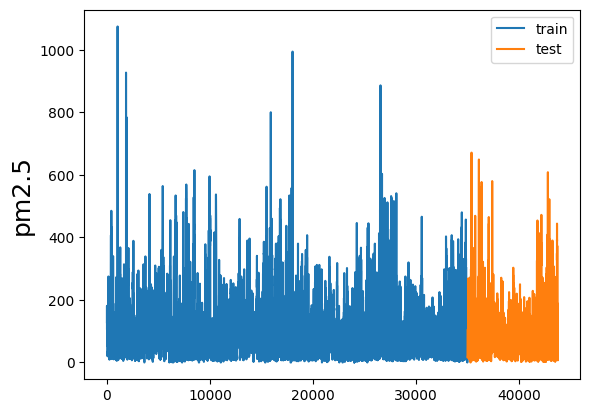

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,4 hours 1 min
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.1
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_unknownUser_1h805i
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.676 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:35032
Cols:141

,pm2.5,pm2.5_lag1,pm2.5_avg_window_length2,pm2.5_lag2,pm2.5_avg_window_length3,pm2.5_lag3,pm2.5_avg_window_length4,pm2.5_lag4,pm2.5_avg_window_length5,pm2.5_lag5,pm2.5_avg_window_length6,pm2.5_lag6,pm2.5_avg_window_length7,pm2.5_lag7,pm2.5_avg_window_length8,pm2.5_lag8,pm2.5_avg_window_length9,pm2.5_lag9,pm2.5_avg_window_length10,pm2.5_lag10,pm2.5_avg_window_length11,DEWP_lag1,DEWP_avg_window_length2,DEWP_lag2,DEWP_avg_window_length3,DEWP_lag3,DEWP_avg_window_length4,DEWP_lag4,DEWP_avg_window_length5,DEWP_lag5,DEWP_avg_window_length6,DEWP_lag6,DEWP_avg_window_length7,DEWP_lag7,DEWP_avg_window_length8,DEWP_lag8,DEWP_avg_window_length9,DEWP_lag9,DEWP_avg_window_length10,DEWP_lag10,DEWP_avg_window_length11,TEMP_lag1,TEMP_avg_window_length2,TEMP_lag2,TEMP_avg_window_length3,TEMP_lag3,TEMP_avg_window_length4,TEMP_lag4,TEMP_avg_window_length5,TEMP_lag5,TEMP_avg_window_length6,TEMP_lag6,TEMP_avg_window_length7,TEMP_lag7,TEMP_avg_window_length8,TEMP_lag8,TEMP_avg_window_length9,TEMP_lag9,TEMP_avg_window_length10,TEMP_lag10,TEMP_avg_window_length11,PRES_lag1,PRES_avg_window_length2,PRES_lag2,PRES_avg_window_length3,PRES_lag3,PRES_avg_window_length4,PRES_lag4,PRES_avg_window_length5,PRES_lag5,PRES_avg_window_length6,PRES_lag6,PRES_avg_window_length7,PRES_lag7,PRES_avg_window_length8,PRES_lag8,PRES_avg_window_length9,PRES_lag9,PRES_avg_window_length10,PRES_lag10,PRES_avg_window_length11,Iws_lag1,Iws_avg_window_length2,Iws_lag2,Iws_avg_window_length3,Iws_lag3,Iws_avg_window_length4,Iws_lag4,Iws_avg_window_length5,Iws_lag5,Iws_avg_window_length6,Iws_lag6,Iws_avg_window_length7,Iws_lag7,Iws_avg_window_length8,Iws_lag8,Iws_avg_window_length9,Iws_lag9,Iws_avg_window_length10,Iws_lag10,Iws_avg_window_length11,Is_lag1,Is_avg_window_length2,Is_lag2,Is_avg_window_length3,Is_lag3,Is_avg_window_length4,Is_lag4,Is_avg_window_length5,Is_lag5,Is_avg_window_length6,Is_lag6,Is_avg_window_length7,Is_lag7,Is_avg_window_length8,Is_lag8,Is_avg_window_length9,Is_lag9,Is_avg_window_length10,Is_lag10,Is_avg_window_length11,Ir_lag1,Ir_avg_window_length2,Ir_lag2,Ir_avg_window_length3,Ir_lag3,Ir_avg_window_length4,Ir_lag4,Ir_avg_window_length5,Ir_lag5,Ir_avg_window_length6,Ir_lag6,Ir_avg_window_length7,Ir_lag7,Ir_avg_window_length8,Ir_lag8,Ir_avg_window_length9,Ir_lag9,Ir_avg_window_length10,Ir_lag10,Ir_avg_window_length11
type,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.0,-32.5,-33.0,-32.333333333333336,-33.0,-31.5,-33.0,-31.2,-33.0,-30.666666666666668,-33.0,-30.285714285714285,-33.0,-30.0,-33.0,-29.77777777777778,-33.0,-29.5,-33.0,-29.272727272727273,-19.0,-18.5,-19.0,-18.666666666666668,-19.0,-18.5,-19.0,-18.2,-19.0,-17.833333333333332,-19.0,-17.571428571428573,-19.0,-17.375,-19.0,-17.22222222222222,-19.0,-17.0,-19.0,-16.818181818181817,991.0,991.0,991.0,991.3333333333334,991.0,991.75,991.0,992.2,991.0,992.5,991.0,992.7142857142856,991.0,992.875,991.0,993.0,991.0,993.1,991.0,993.181818181818,0.45,0.6699999999999752,0.45,0.5966666666666074,0.45,0.669999999999928,0.45,0.7139999999999431,0.45,0.7433333333333144,0.45,0.7642857142857142,0.45,0.78,0.45,0.8422222222222222,0.45,0.891,0.45,0.8909090909090908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mea

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_4_AutoML_5_20230721_104323


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       5/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# GLM base models (used / total)           1/1
# DRF base models (used / total)           1/2
# DeepLearning base models (used / total)  1/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

In [ ]:
for num_lags in range(2,12,2):
  print(num_lags)
  df2 = df.copy()
  num_lags = num_lags # number of lags and window lenghts for mean aggregation
  delay = 1 # predict target one step ahead
  for column in df2:
    for lag in range(1,num_lags+1):
      df2[column + '_lag' + str(lag)] = df2[column].shift(lag*-1-(delay-1))
      if column != 'wnd_dir':
#          print(column + '_avg_window_length' + str(lag+1))
          df2[column + '_avg_window_length' + str(lag+1)] = df2[column].shift(-1-(delay-1)).rolling(window=lag+1,center=False).mean().shift(1-(lag+1))

  df2.dropna(inplace=True)
  mask = (df2.columns.str.contains('pm2.5') | df2.columns.str.contains('lag') | df2.columns.str.contains('window'))
  df_processed = df2[df2.columns[mask]]

  # the columns in the processed dataframe
  print(df_processed.columns)
  mask = df_processed.columns.str.contains('pm2.5')
  #df_processed[df_processed.columns[mask]].head(10)
  df_processed.reset_index(drop=True,inplace=True)
  df_train = df_processed.loc[:int(df_processed.shape[0]*0.8),:]
  df_test = df_processed.loc[int(df_processed.shape[0]*0.8):,:]
  plt.plot(df_train.index,df_train['pm2.5'])
  plt.plot(df_test.index,df_test['pm2.5'])
  plt.ylabel('pm2.5',fontsize=18)
  plt.legend(['train','test'])
  plt.show()
  h2o.init(nthreads=-1)
  hf_train = h2o.H2OFrame(df_train)
  hf_test = h2o.H2OFrame(df_test)
  hf_train.describe()
  y = 'pm2.5'
  X = hf_train.columns
  X.remove(y)
  aml = H2OAutoML(max_runtime_secs = -1,
                seed = 42)
  aml.train(x = X,
            y = y,
            training_frame = hf_train,
            leaderboard_frame = hf_test)
  # Get leaderboard with all possible columns
  lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
  print(aml.leader)
